<a href="https://colab.research.google.com/github/Baishnab1234/MLnow_2.0/blob/main/Univariate_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Date: 06.06.2021

Author:[Baishnab Parida](https://github.com/Baishnab1234/MLnow_Girlscript)

In [47]:
cd'/content/drive/MyDrive/Colab Notebooks/EDA FILE'

/content/drive/MyDrive/Colab Notebooks/EDA FILE


In [48]:
ls

cleanedMathData.CSV  student-merge.R  student.txt
student-mat.csv      student-por.csv  univariate_mathData_2.csv


In [49]:
import os

In [50]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os


In [51]:
mathData=pd.read_csv('student-mat.csv',sep=';')

In [52]:
mathData.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [53]:
unimathData=mathData[['G1','G3']]
unimathData.head(5)

,G1,G3
0,5,6
1,5,6
2,7,10
3,15,15
4,6,10


In [54]:
unimathData.to_csv('univariate_mathData_2.csv')

In [55]:
ls

cleanedMathData.CSV  student-merge.R  student.txt
student-mat.csv      student-por.csv  univariate_mathData_2.csv


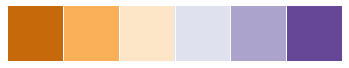

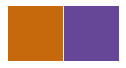

In [56]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr'))
pal=sns.color_palette('PuOr',6)
pal.as_hex()
import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors=['#c6690c','#664697']
sns.set_palette(sns_colors)
sns.palplot(sns.color_palette(sns_colors))

In [57]:
unimathData.columns

Index(['G1', 'G3'], dtype='object')

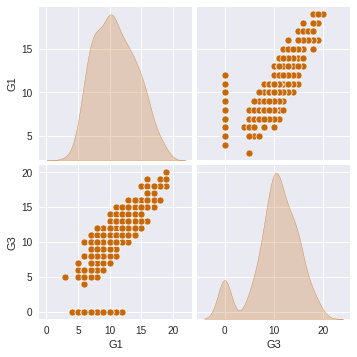

In [59]:
sns.pairplot(unimathData,
x_vars=['G1','G3'],
y_vars=['G1','G3'],
diag_kind='kde'
)

In [60]:
trainDataset=unimathData.sample(frac=0.8,random_state=0)
testDataset=unimathData.drop(trainDataset.index)
print(trainDataset.head())
print(testDataset.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [61]:
trainFeatures=trainDataset.copy()
testFeatures=testDataset.copy()
print(trainFeatures.head())
print(testFeatures.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [62]:
print(trainDataset.shape)
print(testDataset.shape)

(316, 2)
(79, 2)


In [63]:
trainLabels=trainFeatures.pop('G3')
testLabels=testFeatures.pop('G3')
print(trainLabels.head())
print(testLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [64]:
print(trainFeatures.head())
print(testFeatures.head())

     G1
329  14
318  11
317   9
65   16
59   15
    G1
9   14
25   6
28  11
31  17
32  17


In [65]:
model=tf.keras.Sequential([tf.keras.layers.Dense(1)])

In [66]:
model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(0.001), metrics=['mae','mse'])

In [67]:
numEpochs=300
history=model.fit(x=trainFeatures,y=trainLabels,validation_data=(testFeatures,testLabels),epochs=numEpochs)

Epoch 1/300
10/10 [==============================] - 0s 18ms/step - loss: 17.7283 - mae: 17.7283 - mse: 356.4711 - val_loss: 18.6985 - val_mae: 18.6985 - val_mse: 394.4748
Epoch 2/300
10/10 [==============================] - 0s 4ms/step - loss: 17.6109 - mae: 17.6109 - mse: 351.9644 - val_loss: 18.5739 - val_mae: 18.5739 - val_mse: 389.4054
Epoch 3/300
10/10 [==============================] - 0s 4ms/step - loss: 17.4931 - mae: 17.4931 - mse: 347.4490 - val_loss: 18.4495 - val_mae: 18.4495 - val_mse: 384.3743
Epoch 4/300
10/10 [==============================] - 0s 4ms/step - loss: 17.3754 - mae: 17.3754 - mse: 342.9340 - val_loss: 18.3252 - val_mae: 18.3252 - val_mse: 379.3804
Epoch 5/300
10/10 [==============================] - 0s 4ms/step - loss: 17.2589 - mae: 17.2589 - mse: 338.5765 - val_loss: 18.2001 - val_mae: 18.2001 - val_mse: 374.3913
Epoch 6/300
10/10 [==============================] - 0s 4ms/step - loss: 17.1409 - mae: 17.1409 - mse: 334.1374 - val_loss: 18.0757 - val_mae: 1

In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


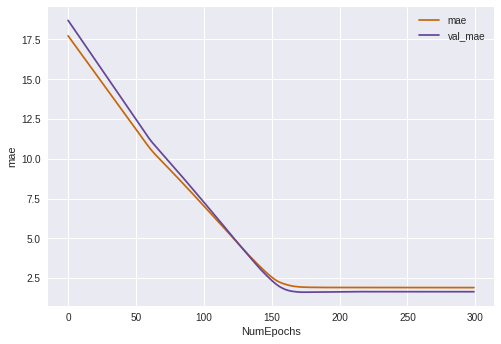

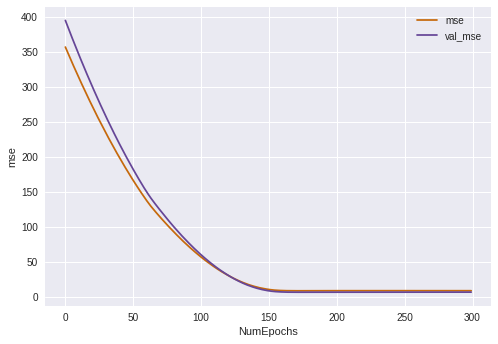

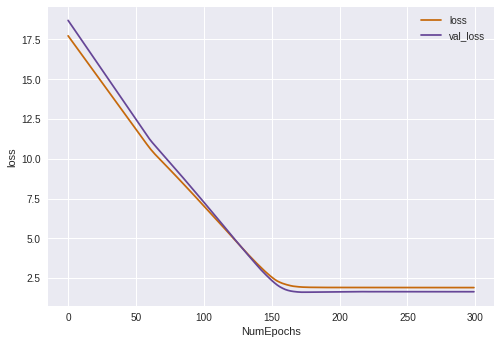

In [69]:
#tempstring='loss'
def curve(tempstring):
   plt.plot(history.history[tempstring])
   plt.plot(history.history[f'val_{tempstring}'])
   plt.xlabel('NumEpochs')
   plt.ylabel(tempstring)
   plt.legend([tempstring,f'val_{tempstring}'])
   plt.show()

curve('mae')
curve('mse')
curve('loss')
  
  

In [70]:
testPreds=model.predict(testFeatures).flatten()

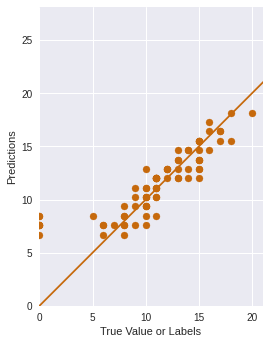

In [71]:
def predPlot(labels,predictions):
    plt.scatter(labels,predictions)
    plt.ylabel('Predictions')
    plt.xlabel('True Value or Labels')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim([0,plt.xlim()[1]])
    plt.ylim([0,plt.ylim()[1]]) 
    plt.plot([-100,100],[-100,100])
    plt.show()

predPlot(testLabels,testPreds)

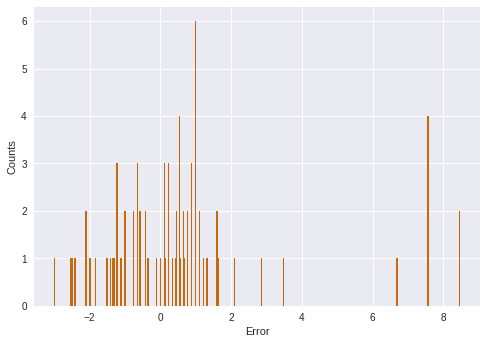

In [72]:
def errorPlot(preds,labels,counts):
    errors=preds-labels
    plt.hist(errors,counts)
    plt.xlabel('Error')
    plt.ylabel('Counts')
    plt.show()

errorPlot(testPreds,testLabels,numEpochs)